In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
print(f'NumPy {np.__version__}')

import skimage as ski
print(f'skimage {ski.__version__}')

NumPy 1.26.4
skimage 0.24.0


*Note: NumPy 2.0 was released recently. scikit-image 0.24 is compatible.*

⚠️ Note the import convention above: `import skimage as ski`. If you forget to import `skimage`, all the examples below will fail to execute!

# Part 1: Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
rng = np.random.default_rng(44)
random_image = rng.random([500, 500])
random_image.shape, random_image.dtype

((500, 500), dtype('float64'))

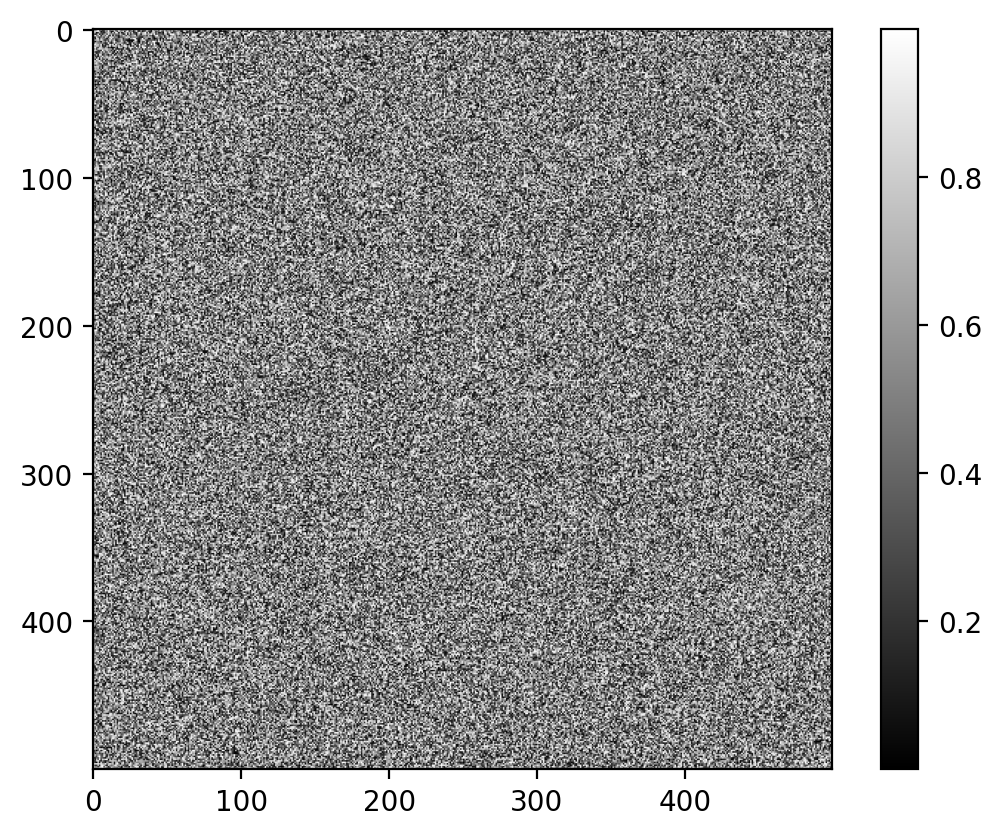

In [5]:
plt.imshow(random_image, cmap='gray')
plt.colorbar();

The same holds for "real-world" images:

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


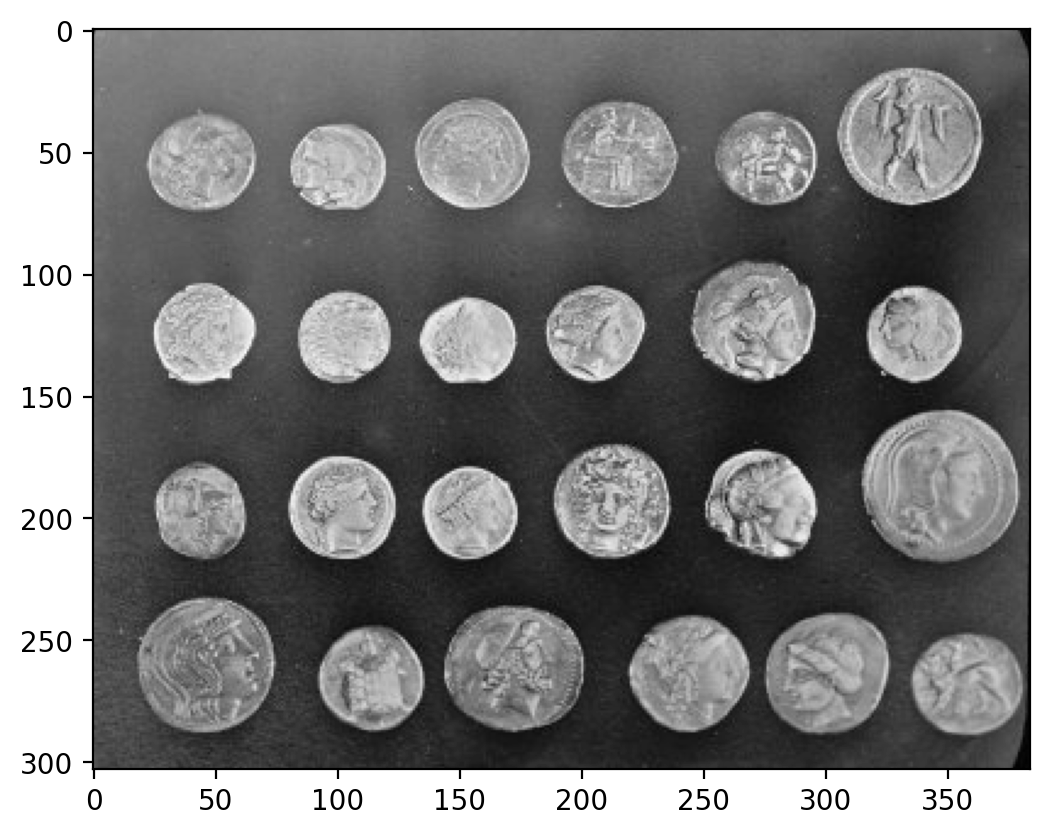

In [6]:
coins = ski.data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
print('shape:', coins.shape)

plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


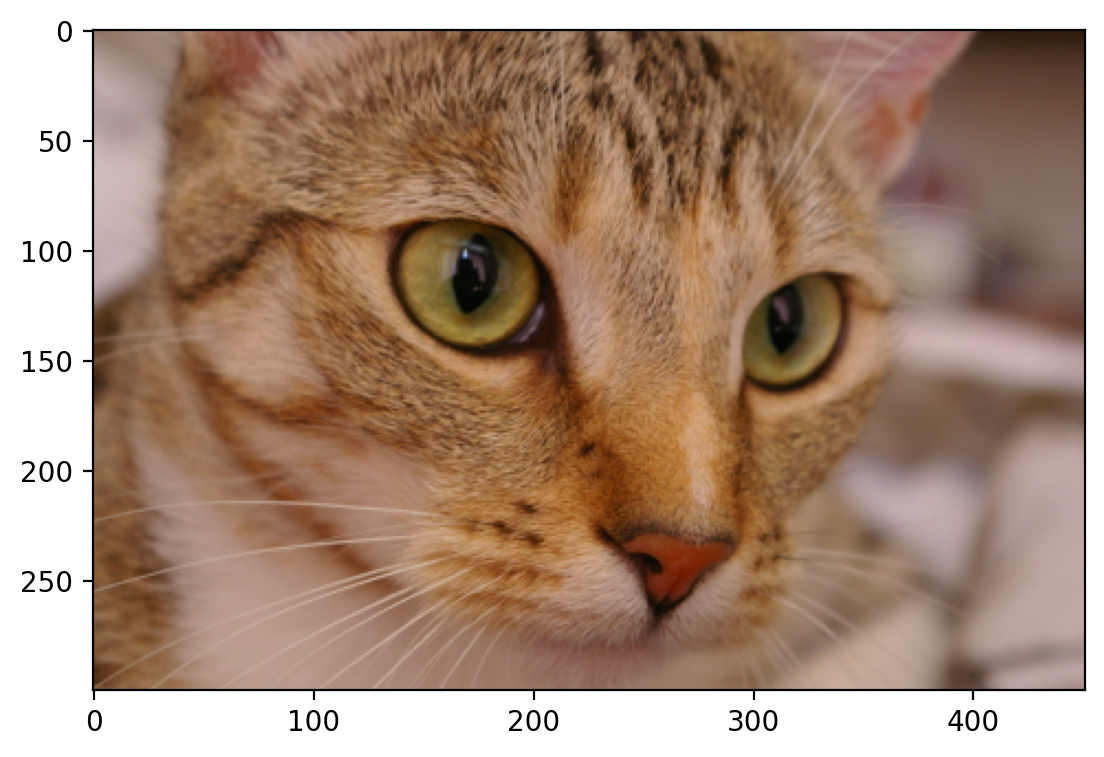

In [7]:
cat = ski.data.chelsea()

print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);

These are *just NumPy arrays*. E.g., we can make a red square by using standard array slicing and manipulation:

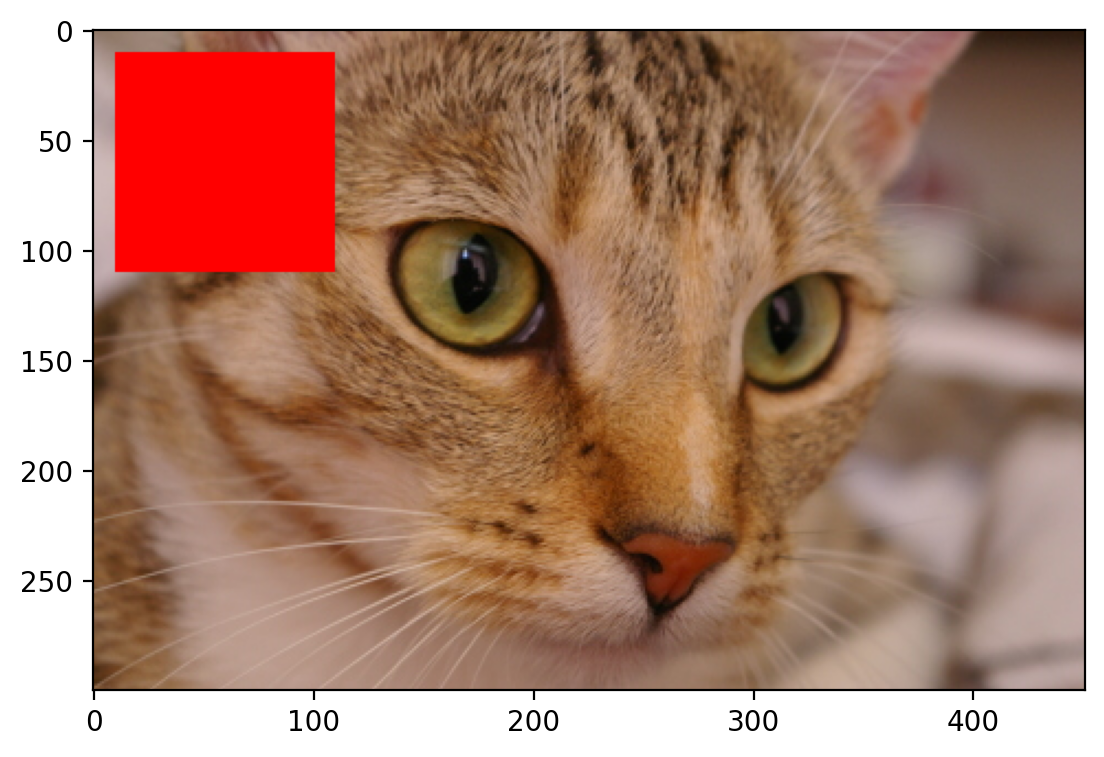

In [8]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th channel, called an *alpha layer*.

## Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale (or volumetric) |(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib

In [9]:
img0 = ski.data.chelsea()
img1 = ski.data.rocket()

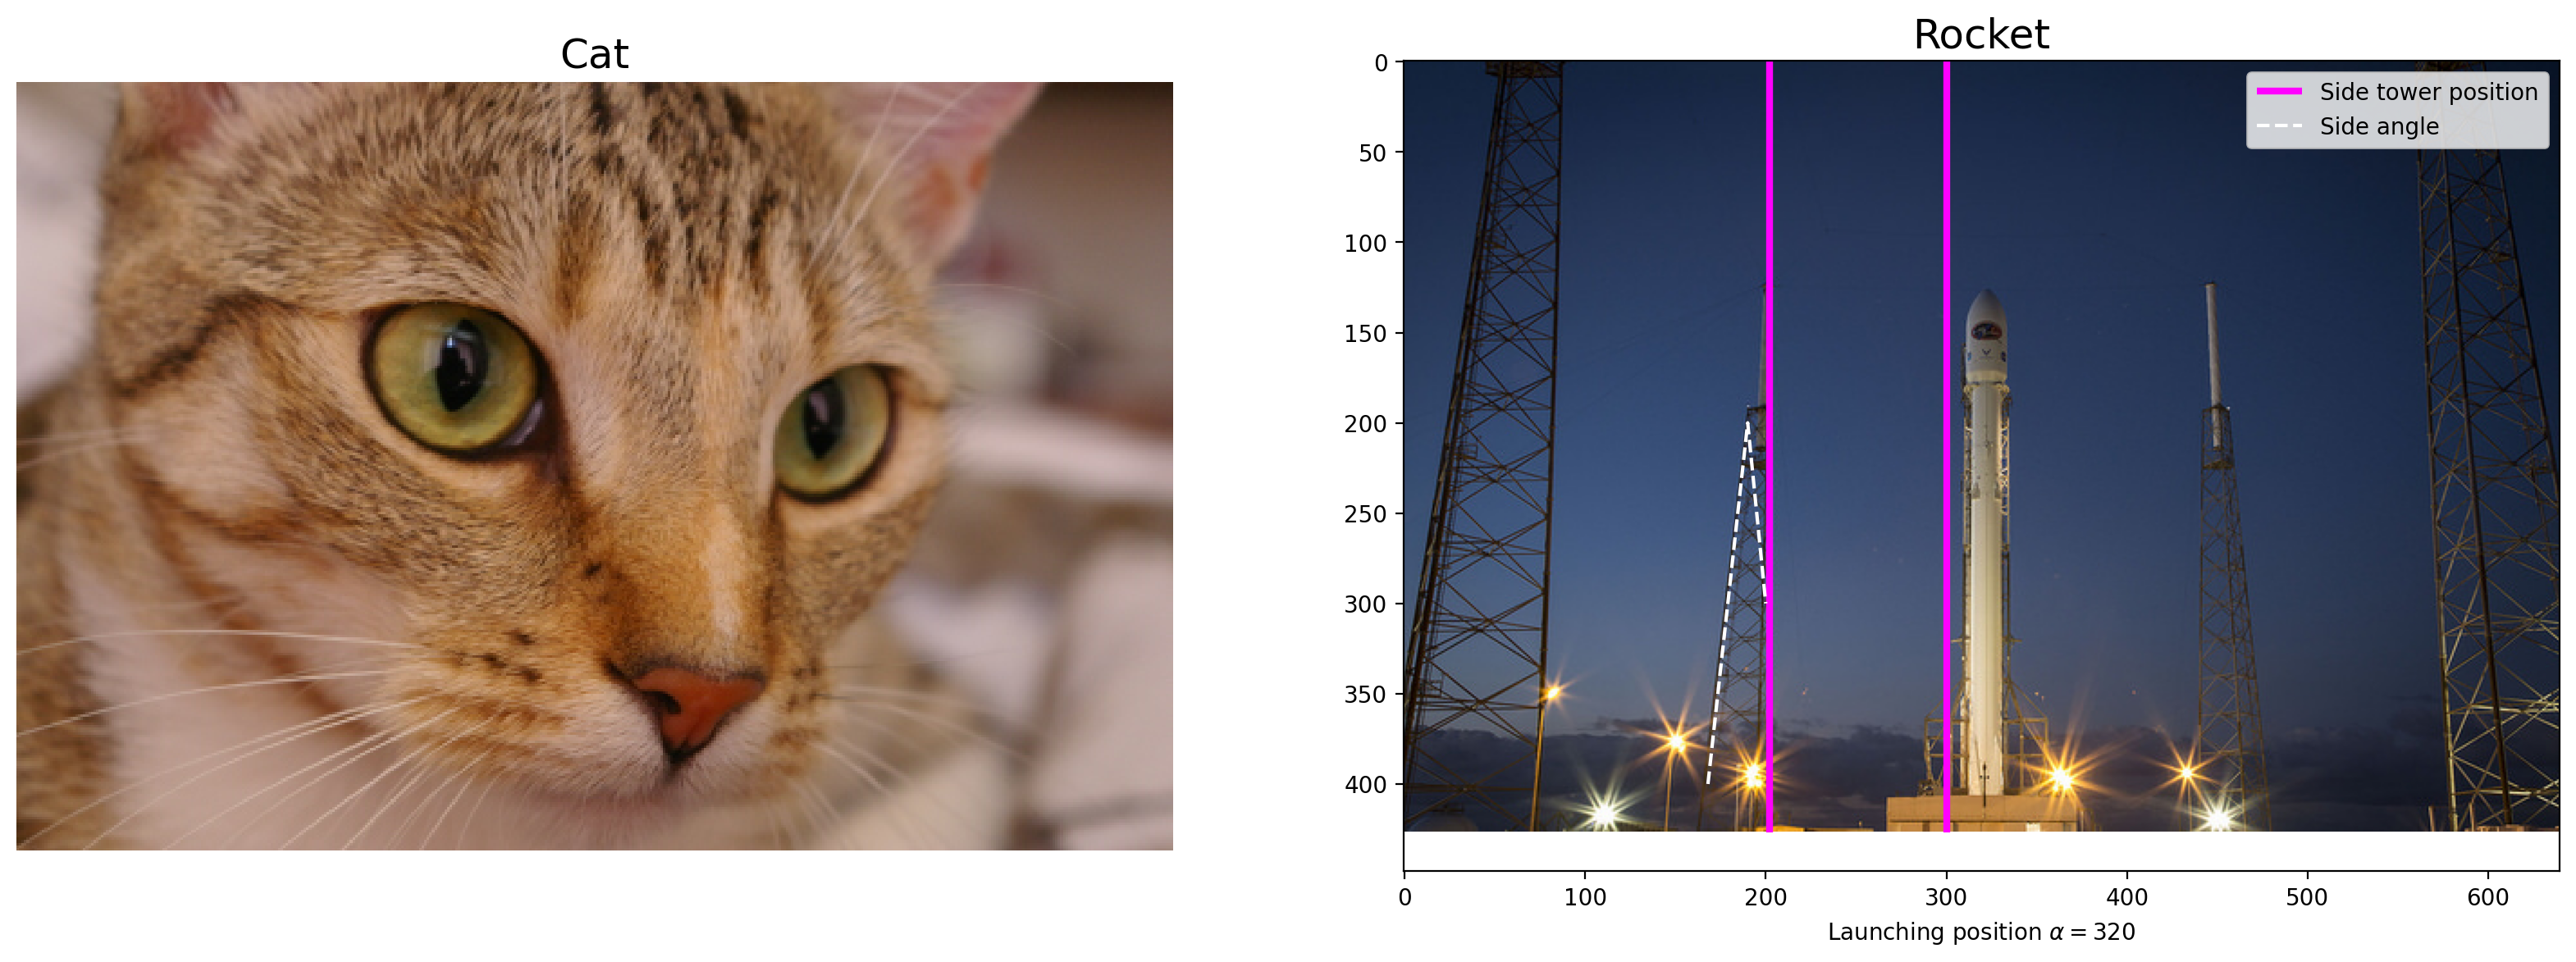

In [10]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202, 300], 0, img1.shape[0], colors='magenta', linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='white', linestyle='--', label='Side angle')

ax1.legend();

For more on plotting, see the [Matplotlib documentation](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and [pyplot API](https://matplotlib.org/api/pyplot_summary.html).

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions—the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


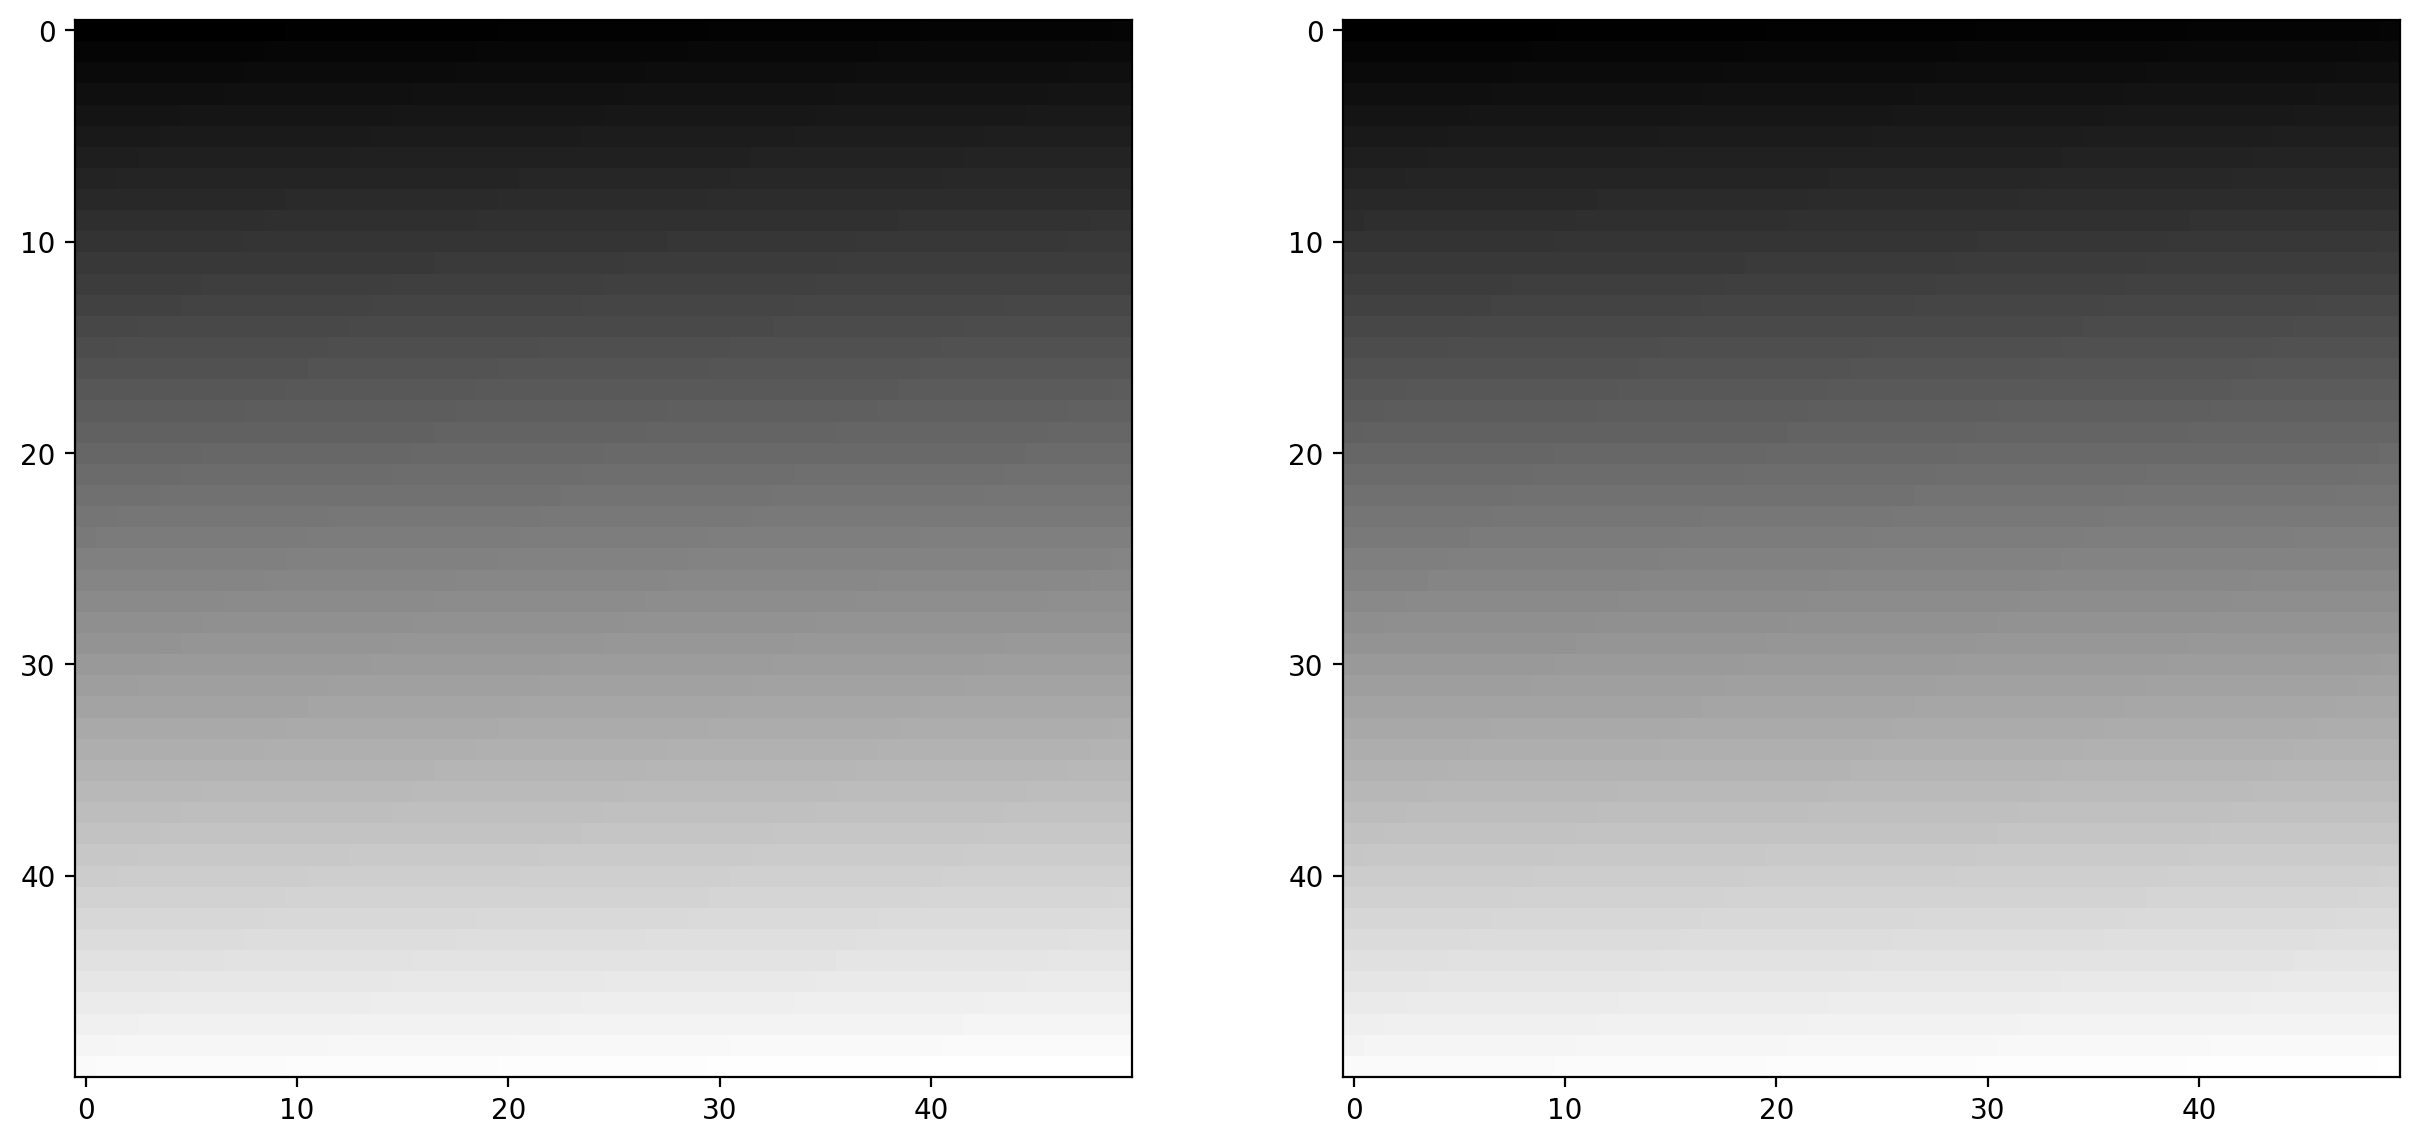

In [11]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

When we first designed the library, we always *assumed* that floating type images go from 0-1, and unsigned bytes from 0 to 255.

For floating point images, we're moving away from that design, because often you want to represent quantities that don't fit that mold: e.g., you may be looking at temperature or rainfall data.

If you're just working with standard imaging data, continue to use 0-1.

When loading integer images (e.g., 0-255), you'll often want to convert those to floating point (0-1). You may do that using `img_as_float`:

In [12]:
cat = ski.data.chelsea()
print(cat.dtype, cat.min(), cat.max())

cat_float = ski.util.img_as_float(cat)
print(cat_float.dtype, cat_float.min(), cat_float.max())

print()
print("231/255 =", 231/255.)

uint8 0 231
float64 0.0 0.9058823529411765

231/255 = 0.9058823529411765


## Image I/O

Mostly, we won't be using images from the scikit-image example data sets, but images stored on disk in JPEG, PNG, or TIFF format.  Since scikit-image operates on NumPy arrays, *any* image reader library that returns arrays will do.  We recommend `imageio`, but `matplotlib`, `pillow`, etc. also work.

scikit-image provides a convenience wrapper around `image`, in the form of the `skimage.io` submodule:

<class 'numpy.ndarray'>
uint8
(300, 225, 3)
0 255


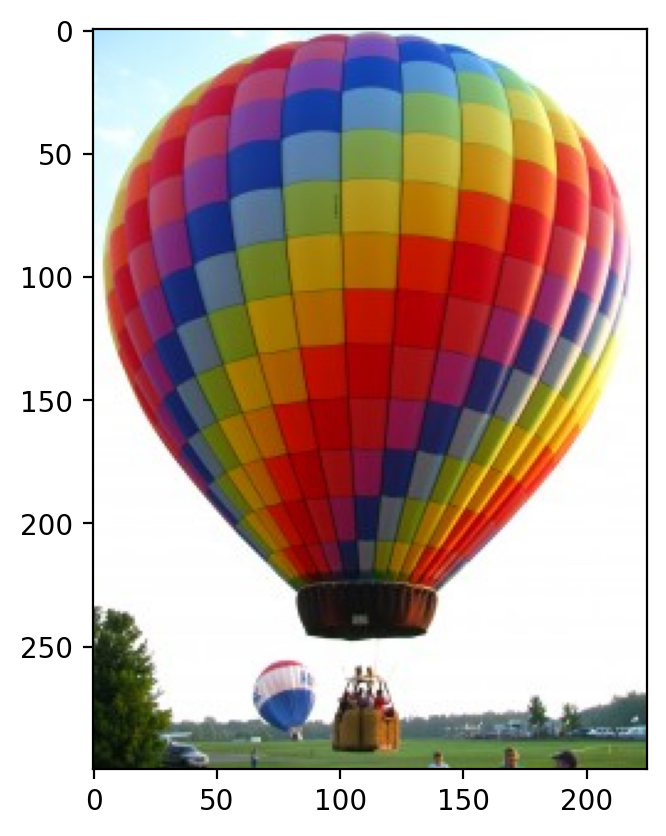

In [13]:
image = ski.io.imread('./data/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

We also have the ability to load multiple images from a folder:

In [14]:
ic = ski.io.ImageCollection(['./*.png', './data/*.png', './data/*.jpg'])

print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


['./data/Bells-Beach.jpg', './data/balloon.jpg', './logo.png']

In [15]:
import os

def plot_collection(ic : ski.io.ImageCollection):
    """Display images in an ImageCollection in a grid.

    """
    f, axes = plt.subplots(ncols=3, nrows=int(np.ceil(len(ic) / 3)))

    # subplots returns the figure and an array of axes
    # we use `axes.ravel()` to turn these into a list
    axes = axes.ravel()

    for ax in axes:
        # Hide axis labels
        ax.axis('off')

    for i, image in enumerate(ic):
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(os.path.basename(ic.files[i]))
    
    plt.tight_layout()

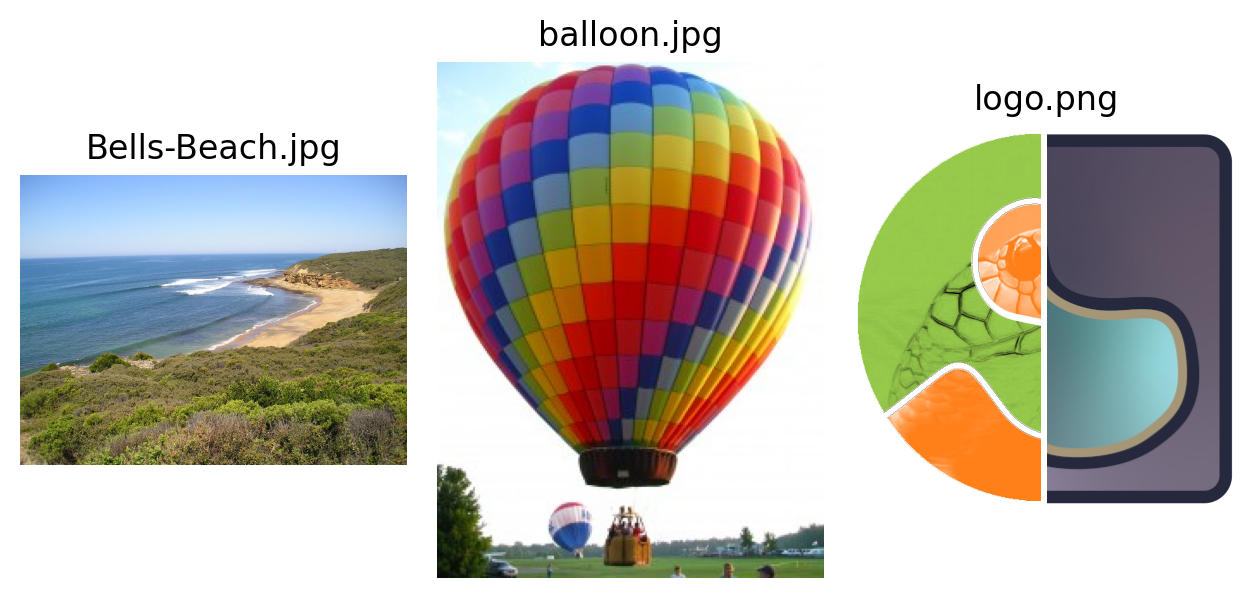

In [16]:
plot_collection(ic)

### Aside: `enumerate`

`enumerate` gives us each element in a container, along with its position.

In [17]:
animals = ['cat', 'dog', 'leopard']

In [18]:
for i, animal in enumerate(animals):
    print('The animal in position {} is {}'.format(i, animal))

The animal in position 0 is cat
The animal in position 1 is dog
The animal in position 2 is leopard


## Exercise 1: draw the letter H

Define a function that takes as input an RGB image (shape `MxNx3`) and a pair of coordinates, `(row, column)`, and returns a copy with a green letter H overlaid at those coordinates. The coordinates point to the top-left corner of the H.

The arms and strut of the H should have a thickness of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [19]:
def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()
    
    ...
    
    return out 

Test your function like so:

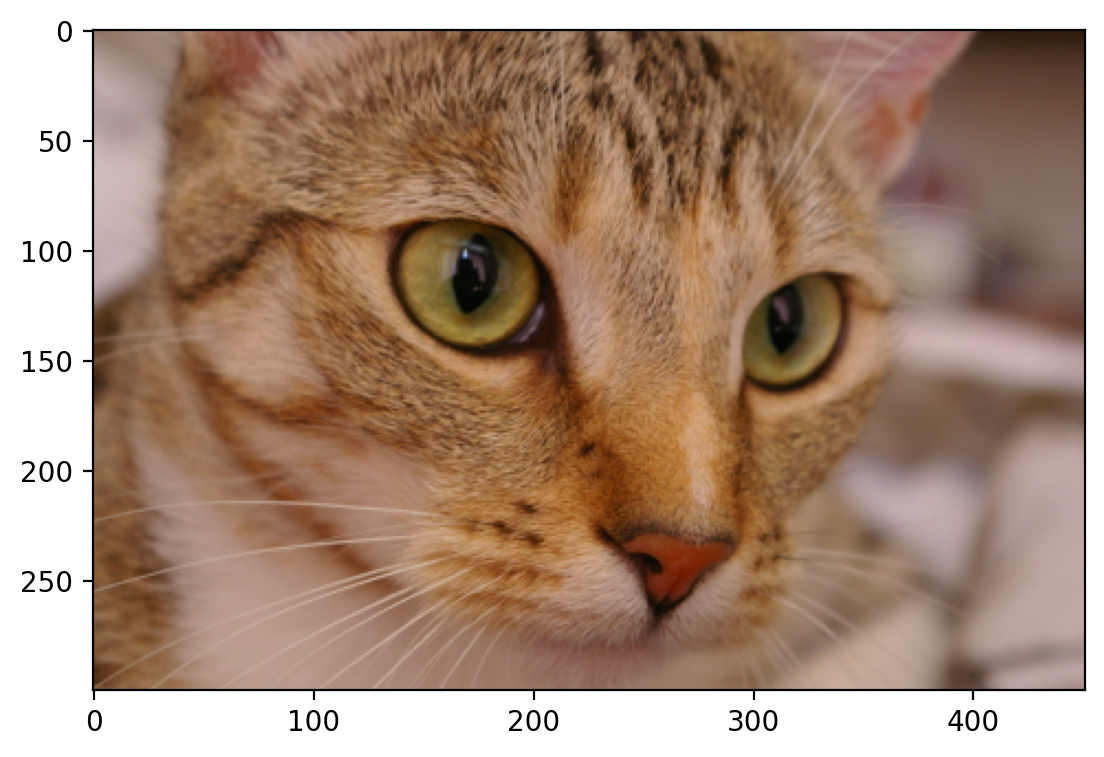

In [20]:
cat = ski.data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);

## <span class="exercize">Exercise 2: visualizing RGB channels</span>

Display the different color channels of the image (each as a gray-scale image).  Start with the following template:

TypeError: Image data of dtype object cannot be converted to float

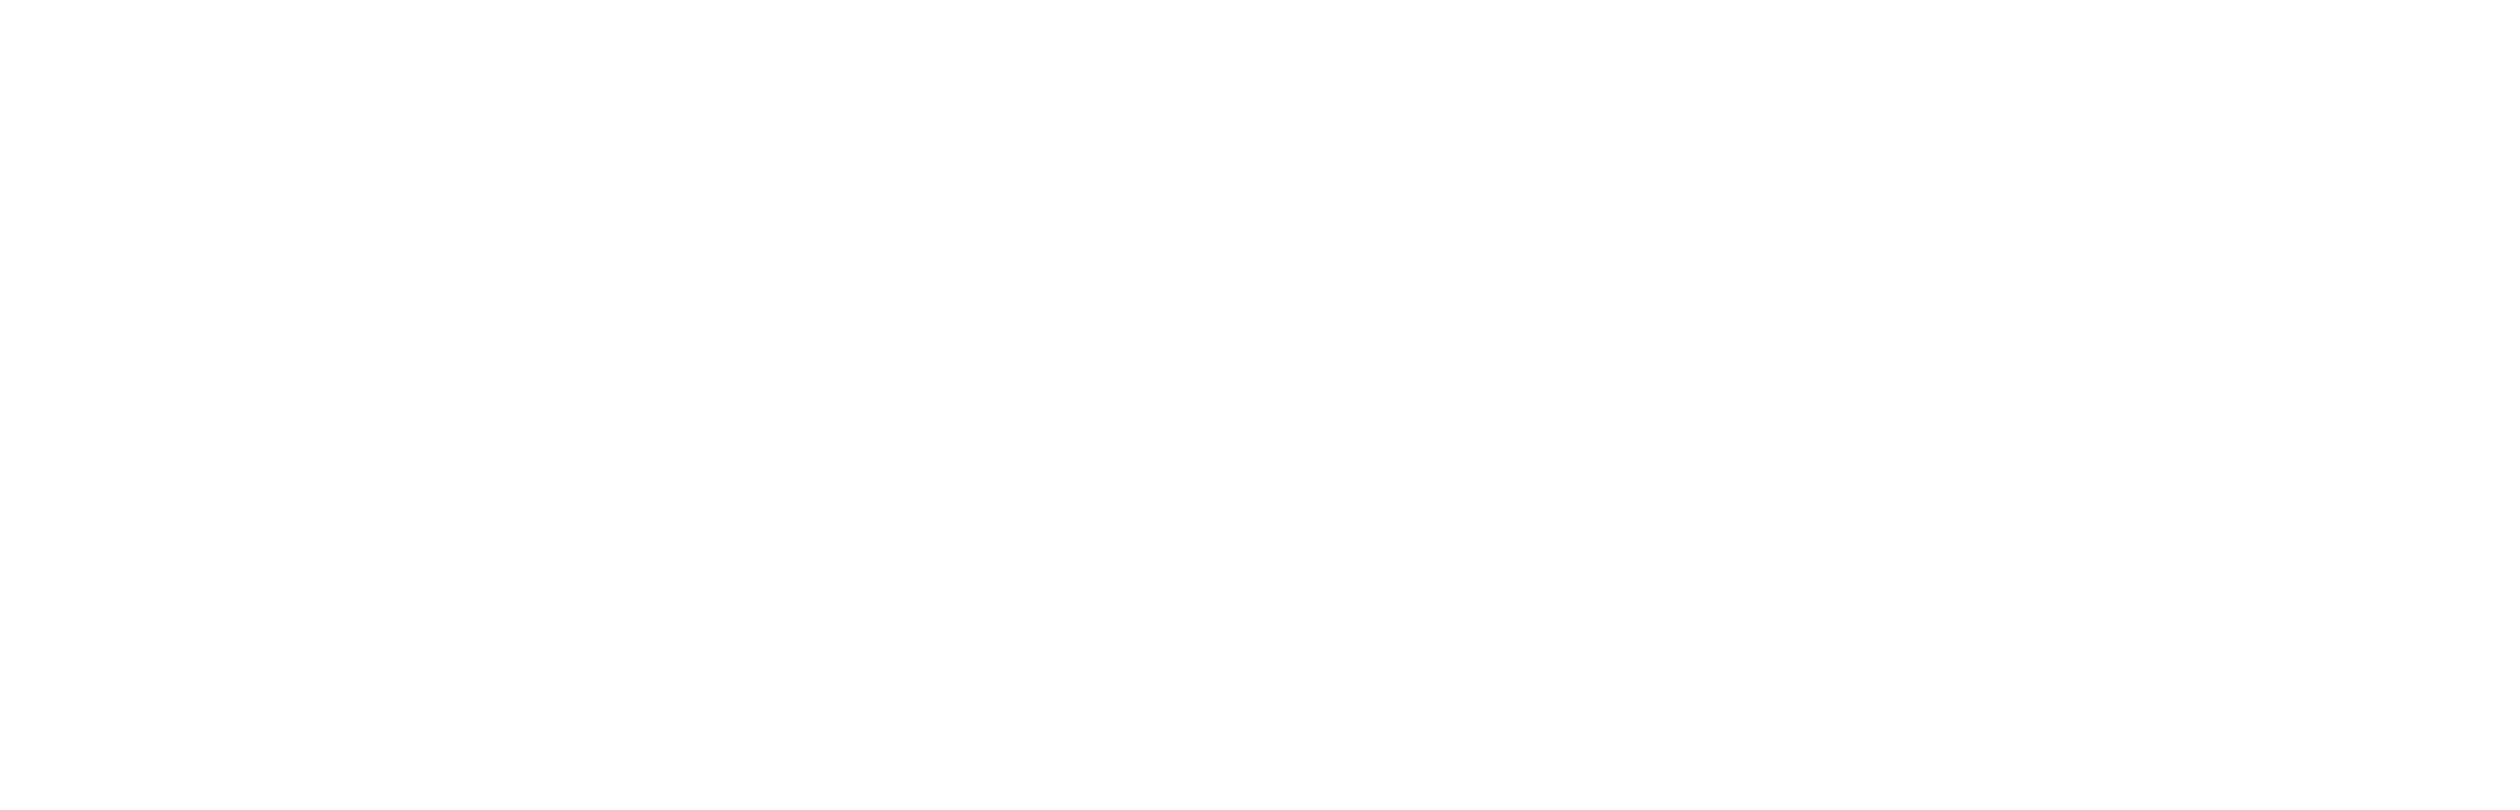

In [21]:
# --- read in the image ---

image = plt.imread('./data/Bells-Beach.jpg')

# --- assign each color channel to a different variable ---

r = ...  # FIXME: grab channel from image...
g = ...  # FIXME
b = ...  # FIXME

# --- display the image and r, g, b channels ---
f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes

ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

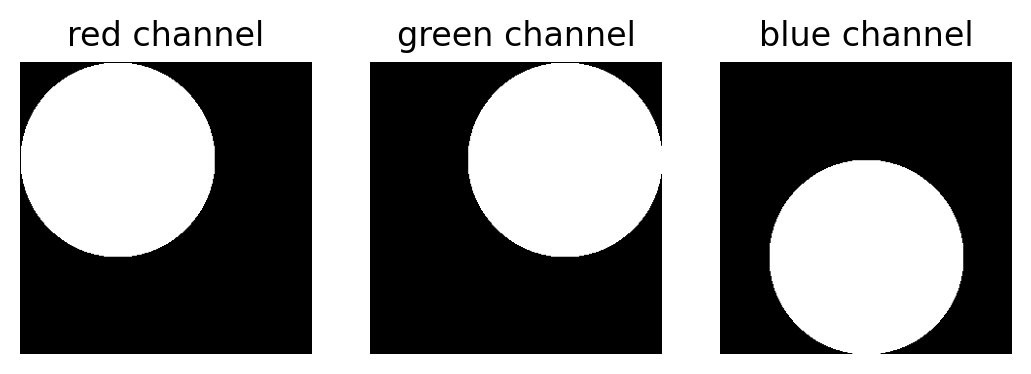

In [22]:
red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = ski.draw.disk(center=(100, 100), radius=100)
red[r, c] = 1

r, c = ski.draw.disk(center=(100, 200), radius=100)
green[r, c] = 1

r, c = ski.draw.disk(center=(200, 150), radius=100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel, name) in zip(axes, [red, green, blue], ['red', 'green', 'blue']):
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'{name} channel')
    ax.axis('off')

## Exercise 3: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale (luminance) image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Change the coefficients above to be 1/3 (i.e., take the mean of the red, green, and blue channels), to see how that approach compares with `rgb2gray`.

TypeError: Image data of dtype object cannot be converted to float

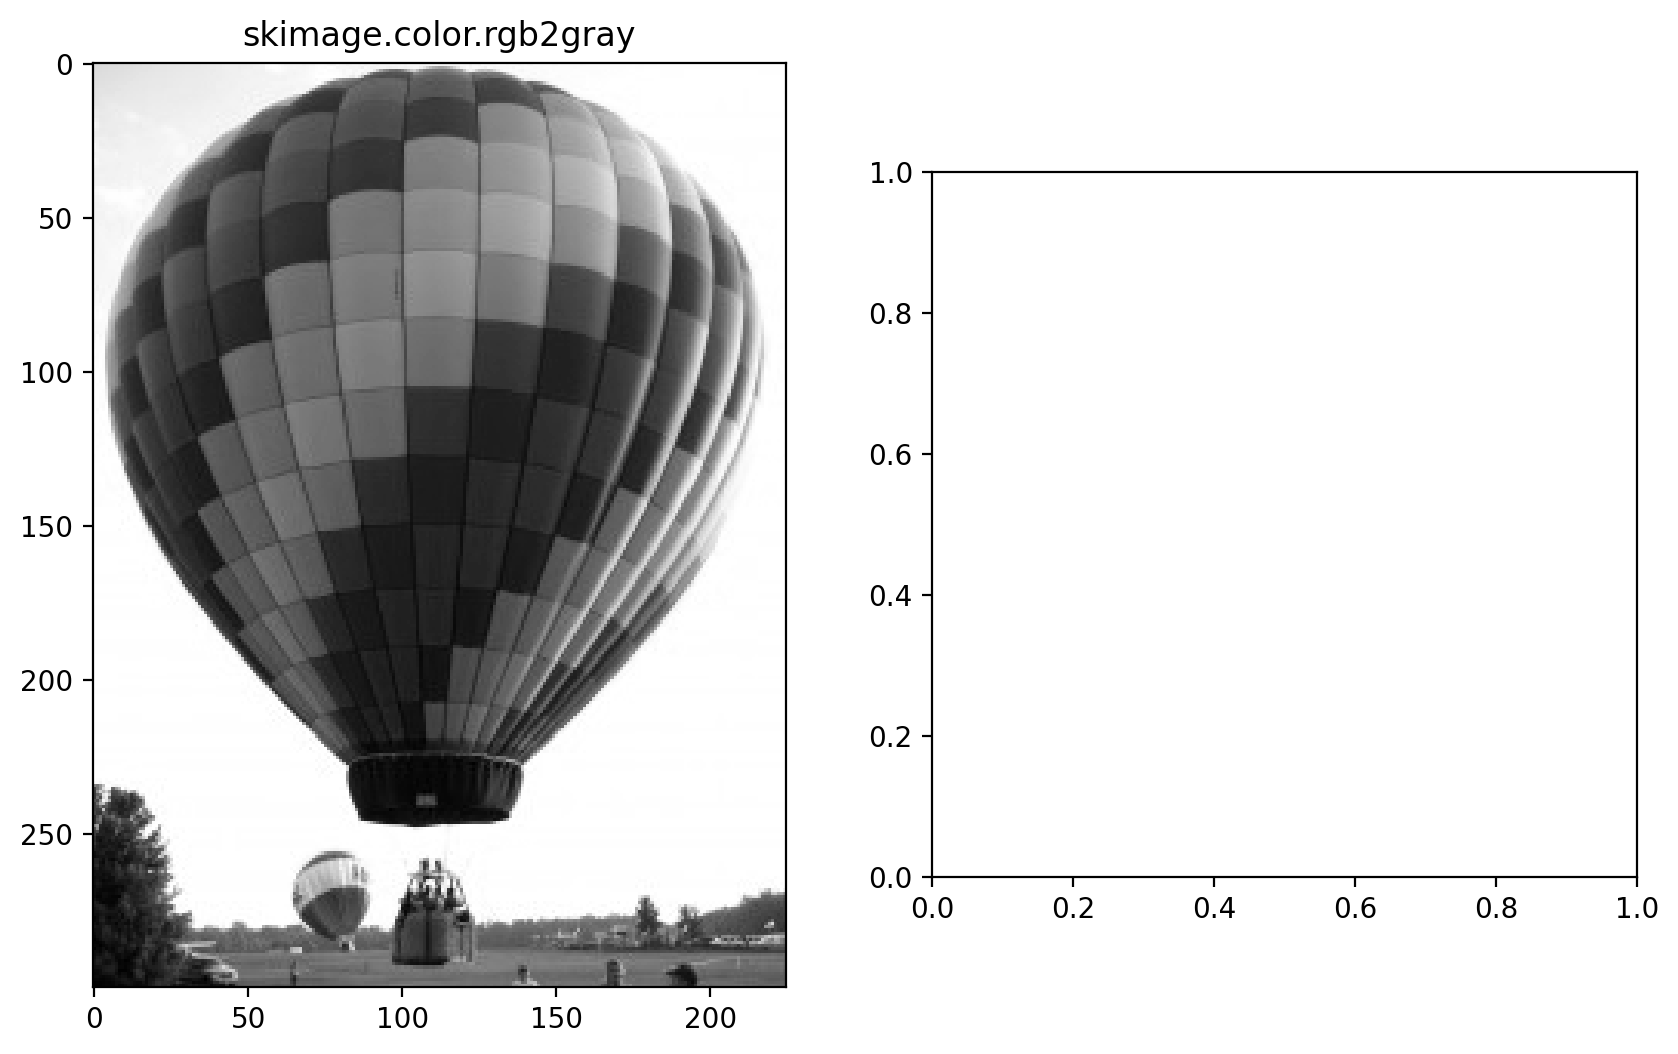

In [23]:
image = ski.img_as_float(ski.io.imread('./data/balloon.jpg'))

gray = ski.color.rgb2gray(image)
my_gray = ...  # FIXME; compute R, G, B average here

# --- display the results ---
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')